In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart_data=pd.read_csv("heart.csv")

In [3]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
heart_data['category']=pd.cut(heart_data['age'],bins=[0,12,18,50,100],labels=['Child','Young','Adult','Old'])
heart_data['target_text']=heart_data['target'].apply(lambda x:'Yes'if x==1 else 'No')
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,category,target_text
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,Old,No
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,Adult,No
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,Old,No
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,Old,No


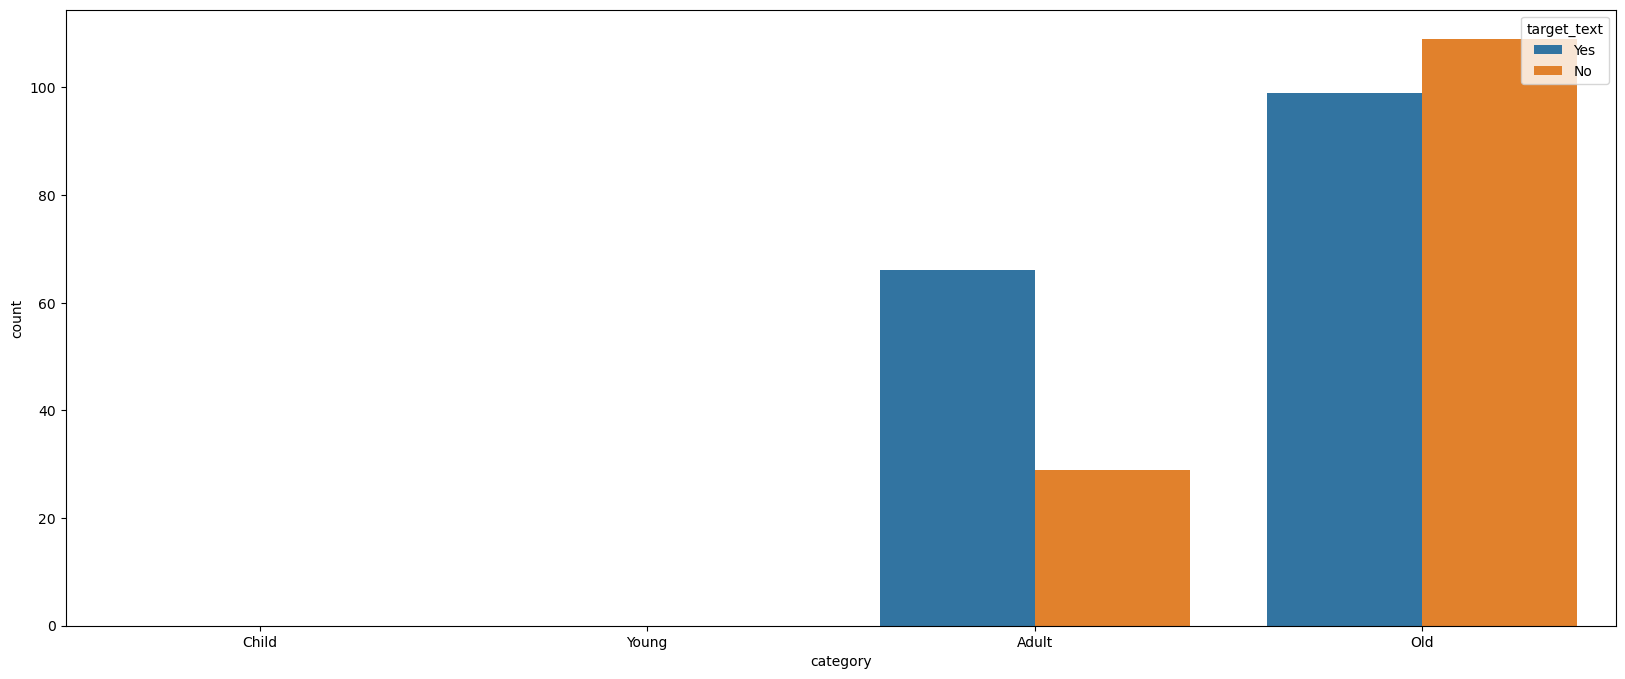

In [5]:
fig,ax=plt.subplots(1,1,figsize=(20,8))
sns.countplot(data=heart_data,x='category',hue='target_text',ax=ax)
plt.show()

  target_text category  Counts
0          No    Child       0
1          No    Young       0
2          No    Adult      29
3          No      Old     109
4         Yes    Child       0
5         Yes    Young       0
6         Yes    Adult      66
7         Yes      Old      99


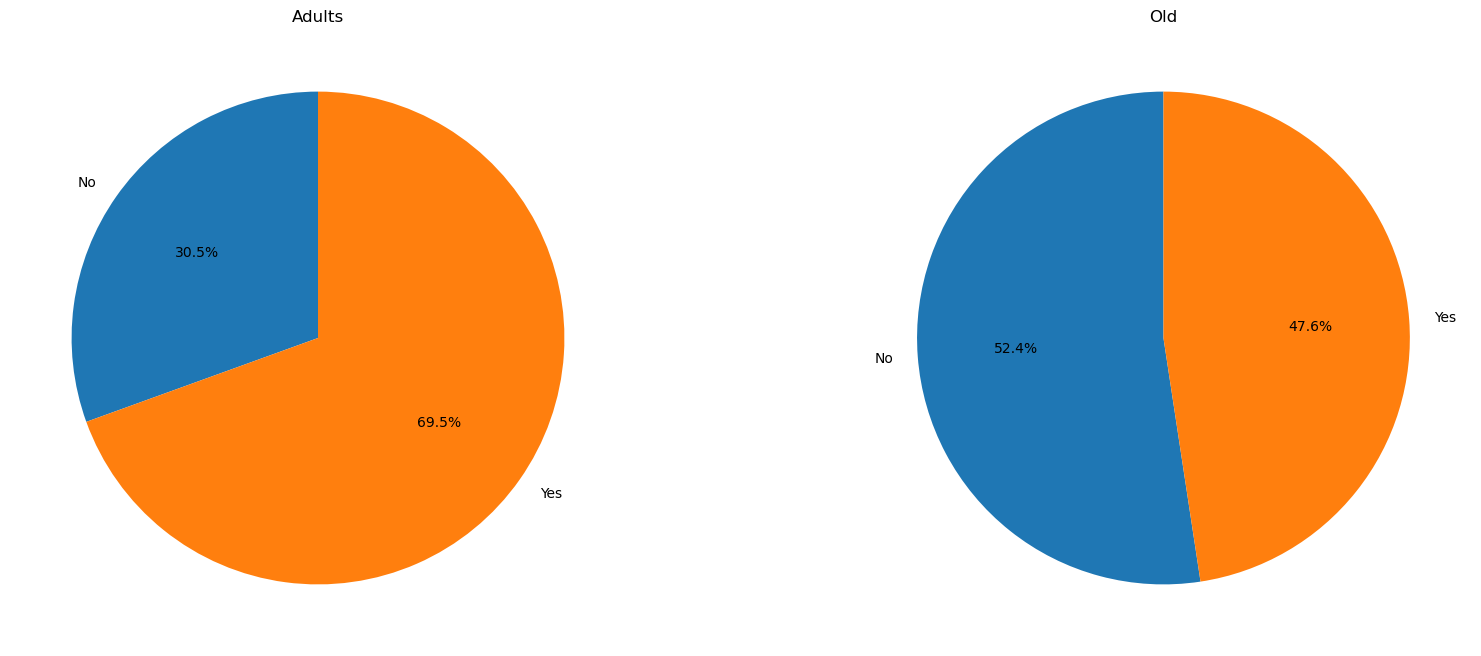

In [6]:
h=heart_data.groupby(['target_text','category'])['target_text'].count().reset_index(name='Counts')
print(h)
fig,ax=plt.subplots(1,2,figsize=(20,8))
ax[0].pie([29,66],labels=['No','Yes'],radius=1,startangle=90,autopct="%0.1f%%")
ax[0].set_title('Adults')
ax[1].pie([109,99],labels=['No','Yes'],radius=1,startangle=90,autopct="%0.1f%%")
ax[1].set_title('Old')
plt.show()

In [7]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          303 non-null    int64   
 1   sex          303 non-null    int64   
 2   cp           303 non-null    int64   
 3   trestbps     303 non-null    int64   
 4   chol         303 non-null    int64   
 5   fbs          303 non-null    int64   
 6   restecg      303 non-null    int64   
 7   thalach      303 non-null    int64   
 8   exang        303 non-null    int64   
 9   oldpeak      303 non-null    float64 
 10  slope        303 non-null    int64   
 11  ca           303 non-null    int64   
 12  thal         303 non-null    int64   
 13  target       303 non-null    int64   
 14  category     303 non-null    category
 15  target_text  303 non-null    object  
dtypes: category(1), float64(1), int64(13), object(1)
memory usage: 36.1+ KB


               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

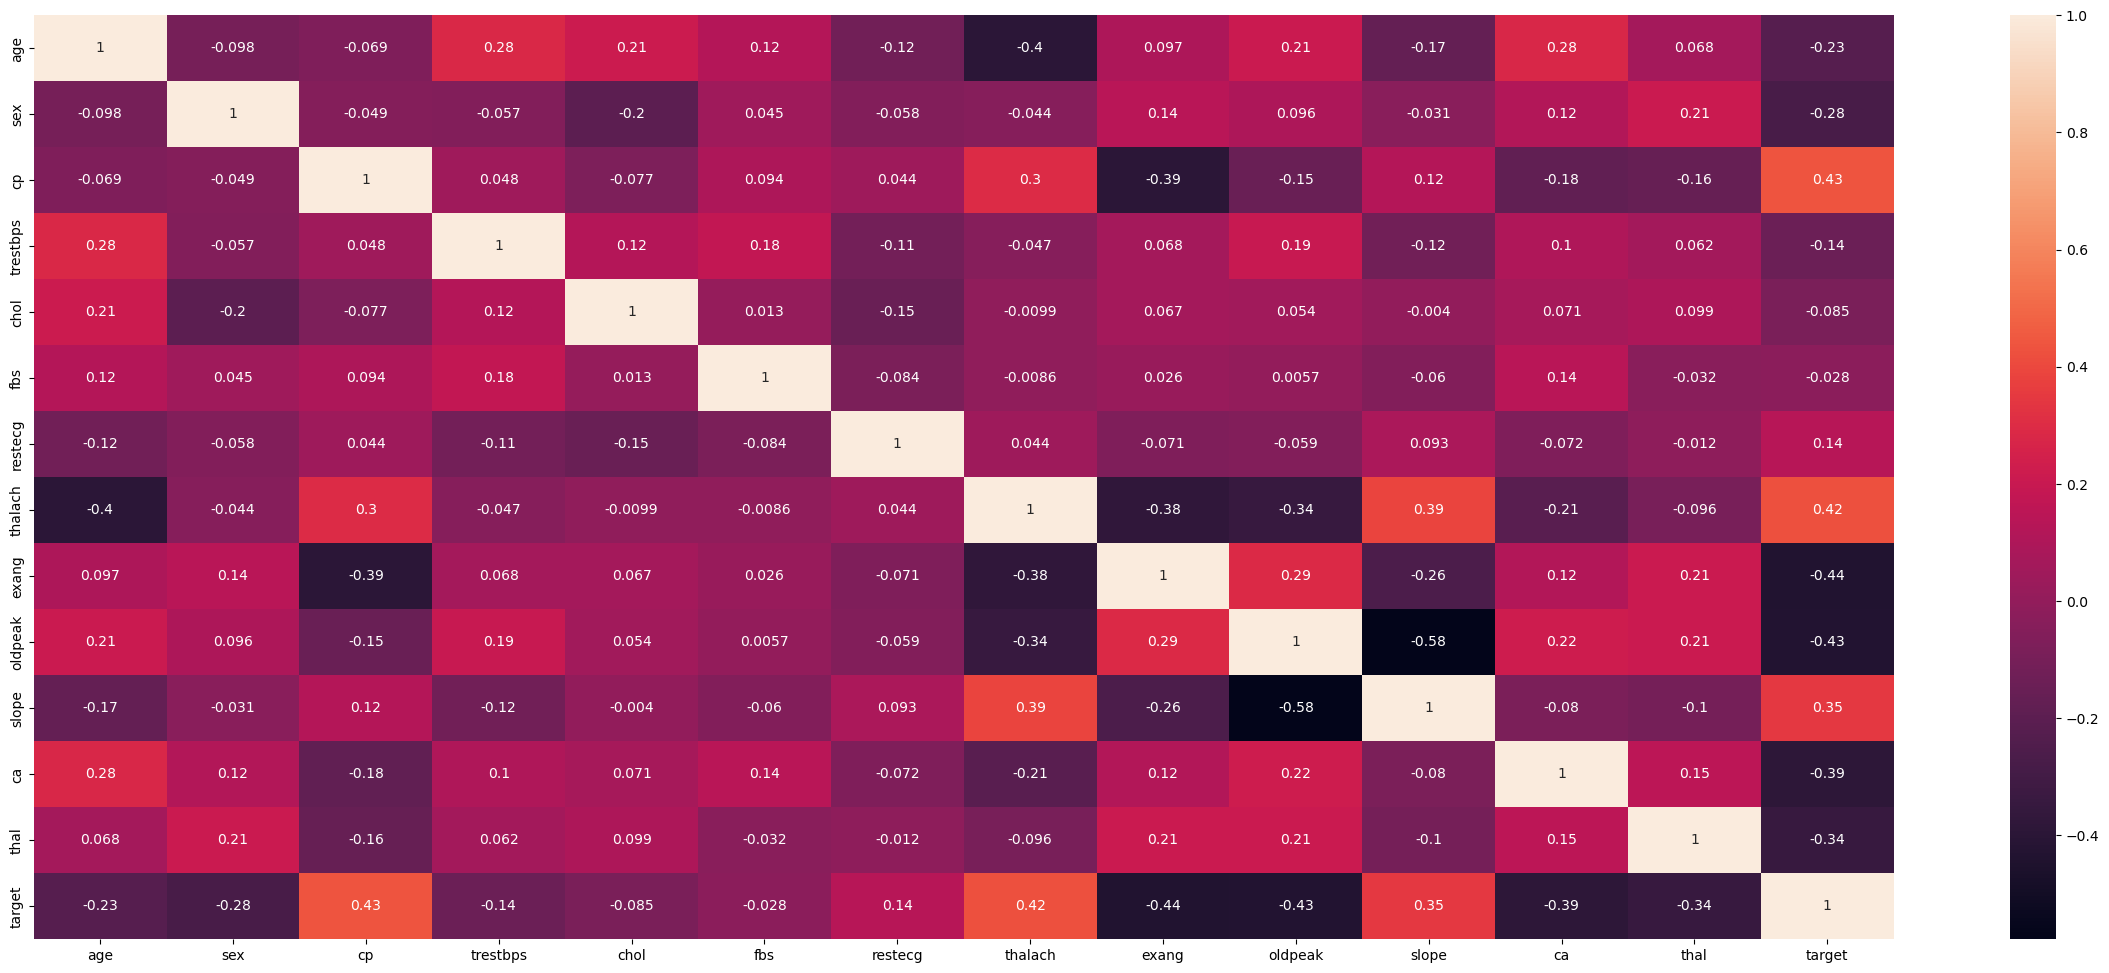

In [8]:
heart_data.drop(['category','target_text'],axis=1,inplace=True)
corre=heart_data.corr()
print(corre)
plt.figure(figsize=(30,12))
sns.heatmap(corre,annot=True)
plt.show()

In [9]:
corre=pd.DataFrame(corre)
corre
for i in corre.columns.tolist():
 inde=corre.index[(corre[i]>0.5) | (corre[i]<-0.5)].tolist()
 for j in inde:
  if i!=j and i!='target' and j!='target':
   print(f"{i}---{j}\n")
print(corre)

oldpeak---slope

slope---oldpeak

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -

In [10]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(heart_data,train_size=0.7,test_size=0.3,random_state=100)
df_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3,1
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2,1
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
79,58,1,2,105,240,0,0,154,1,0.6,1,0,3,1
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0


In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_train[['age','cp','trestbps','chol','thalach','oldpeak','slope','ca','thal']]=scaler.fit_transform(df_train[['age','cp','trestbps','chol','thalach','oldpeak','slope','ca','thal']])
df_test[['age','cp','trestbps','chol','thalach','oldpeak','slope','ca','thal']]=scaler.fit_transform(df_test[['age','cp','trestbps','chol','thalach','oldpeak','slope','ca','thal']])

In [12]:
Y_train=df_train.pop('target')


In [13]:
X_train=df_train
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
3,0.182625,1,-0.026499,-0.661283,-0.226722,0,1,1.256660,0,-0.182910,0.967570,-0.721521,-0.528444
162,-1.481405,1,-0.026499,-0.661283,-1.881974,0,1,1.433355,0,-0.870749,0.967570,-0.721521,-0.528444
112,1.070107,0,0.909796,0.516306,1.386624,0,1,-0.731159,0,-0.698789,0.967570,-0.721521,1.143648
278,0.404495,0,-0.026499,0.280788,1.512340,1,0,0.108142,0,-0.870749,0.967570,1.317978,-0.528444
209,0.515431,1,-0.962794,0.516306,-1.462923,0,1,0.549880,1,-0.870749,0.967570,0.298229,1.143648
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,-0.372052,1,0.909796,-1.838872,-0.520058,0,1,-0.289421,1,0.161009,-0.686662,-0.721521,-0.528444
53,-1.148599,0,0.909796,-1.367836,-2.217215,0,1,1.124138,0,-0.354870,-0.686662,-0.721521,-0.528444
79,0.404495,1,0.909796,-1.544475,-0.142912,0,0,0.196490,1,-0.354870,-0.686662,-0.721521,1.143648
280,-1.370470,1,-0.962794,0.280788,1.428529,0,1,-1.084549,1,0.676889,-0.686662,-0.721521,-2.200537


In [14]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
def build_model(x,y):
 x=sm.add_constant(x)
 logr=sm.Logit(y,x).fit()
 print(logr.summary())
 return logr

model1=build_model(X_train,Y_train)
    

Optimization terminated successfully.
         Current function value: 0.369912
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  212
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                           13
Date:                Mon, 28 Aug 2023   Pseudo R-squ.:                  0.4595
Time:                        14:40:37   Log-Likelihood:                -78.421
converged:                       True   LL-Null:                       -145.09
Covariance Type:            nonrobust   LLR p-value:                 4.510e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4465      0.550      2.628      0.009       0.368       2.525
age            0.1018      0.

In [15]:
X_train1=X_train.drop(['age','restecg'],axis=1)
X_train1

,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal
3,1,-0.026499,-0.661283,-0.226722,0,1.256660,0,-0.182910,0.967570,-0.721521,-0.528444
162,1,-0.026499,-0.661283,-1.881974,0,1.433355,0,-0.870749,0.967570,-0.721521,-0.528444
112,0,0.909796,0.516306,1.386624,0,-0.731159,0,-0.698789,0.967570,-0.721521,1.143648
278,0,-0.026499,0.280788,1.512340,1,0.108142,0,-0.870749,0.967570,1.317978,-0.528444
209,1,-0.962794,0.516306,-1.462923,0,0.549880,1,-0.870749,0.967570,0.298229,1.143648
...,...,...,...,...,...,...,...,...,...,...,...
66,1,0.909796,-1.838872,-0.520058,0,-0.289421,1,0.161009,-0.686662,-0.721521,-0.528444
53,0,0.909796,-1.367836,-2.217215,0,1.124138,0,-0.354870,-0.686662,-0.721521,-0.528444
79,1,0.909796,-1.544475,-0.142912,0,0.196490,1,-0.354870,-0.686662,-0.721521,1.143648
280,1,-0.962794,0.280788,1.428529,0,-1.084549,1,0.676889,-0.686662,-0.721521,-2.200537


In [16]:
logreg=LogisticRegression()
logreg.fit(X_train1,Y_train)
y_train_pred=logreg.predict(X_train1)

In [17]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_train,y_train_pred))

0.8773584905660378


0.9125905797101449


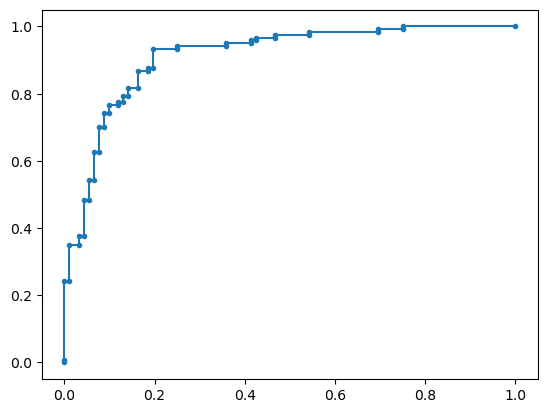

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lr_probs=logreg.predict_proba(X_train1)
lr_probs=lr_probs[:,1]
lr_auc=roc_auc_score(Y_train,lr_probs)
print(lr_auc)
lr_fpr,lr_tpr,_=roc_curve(Y_train,lr_probs)
plt.figure()
plt.plot(lr_fpr,lr_tpr,marker='.')
plt.show()


In [19]:
estimation=pd.DataFrame()
estimation['id']=X_train1.index
estimation['probs']=lr_probs
estimation['Actual']=Y_train.values
estimation

,id,probs,Actual
0,3,0.890569,1
1,162,0.954353,1
2,112,0.861423,1
3,278,0.672433,0
4,209,0.337321,0
...,...,...,...
207,66,0.770254,1
208,53,0.985290,1
209,79,0.607271,1
210,280,0.347588,0


In [20]:
Y_train.shape

(212,)

In [21]:
estimation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      212 non-null    int64  
 1   probs   212 non-null    float64
 2   Actual  212 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.1 KB


In [22]:
Y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 212 entries, 3 to 8
Series name: target
Non-Null Count  Dtype
--------------  -----
212 non-null    int64
dtypes: int64(1)
memory usage: 3.3 KB


In [23]:
numbers=[float(x/10) for x in range(1,10)]
for i in numbers:
 estimation[i]=estimation['probs'].apply(lambda x:1 if x>=i else 0)
print(estimation)

      id     probs  Actual  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      3  0.890569       1    1    1    1    1    1    1    1    1    0
1    162  0.954353       1    1    1    1    1    1    1    1    1    1
2    112  0.861423       1    1    1    1    1    1    1    1    1    0
3    278  0.672433       0    1    1    1    1    1    1    0    0    0
4    209  0.337321       0    1    1    1    0    0    0    0    0    0
..   ...       ...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
207   66  0.770254       1    1    1    1    1    1    1    1    0    0
208   53  0.985290       1    1    1    1    1    1    1    1    1    1
209   79  0.607271       1    1    1    1    1    1    1    0    0    0
210  280  0.347588       0    1    1    1    0    0    0    0    0    0
211    8  0.709022       1    1    1    1    1    1    1    1    0    0

[212 rows x 12 columns]


In [24]:
from sklearn.metrics import confusion_matrix
a=[]
se=[]
sp=[]
for i in numbers:
 cm=confusion_matrix(estimation.Actual,estimation[i])
 TP=cm[0,0]
 TN=cm[1,1]
 FP=cm[0,1]
 FN=cm[1,0]
 a.append((TP+TN)/float(TP+TN+FP+FN))
 se.append(TP/float(TP+FN))
 sp.append(TN/float(TN+FP))
tradeoff=pd.DataFrame()
tradeoff['Thresholds']=numbers
tradeoff['accuracy']=a
tradeoff['sensitivity']=se
tradeoff['specificity']=sp

In [25]:
tradeoff

,Thresholds,accuracy,sensitivity,specificity
0,0.1,0.750000,0.953488,0.698225
1,0.2,0.783019,0.925926,0.734177
2,0.3,0.792453,0.900000,0.750000
3,0.4,0.830189,0.900000,0.795775
4,0.5,0.877358,0.902439,0.861538
5,0.6,0.853774,0.827957,0.873950
6,0.7,0.816038,0.743119,0.893204
7,0.8,0.745283,0.641791,0.923077
8,0.9,0.627358,0.539394,0.936170


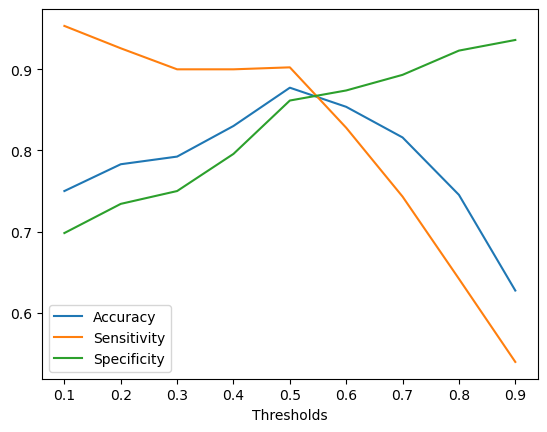

In [26]:
plt.figure()
plt.plot(tradeoff['Thresholds'],tradeoff['accuracy'],label='Accuracy')
plt.plot(tradeoff['Thresholds'],tradeoff['sensitivity'],label='Sensitivity')
plt.plot(tradeoff['Thresholds'],tradeoff['specificity'],label='Specificity')
plt.xlabel('Thresholds')
plt.legend()
plt.show()

In [27]:
import metpy.calc as mpcalc

In [28]:
thresholds_i,y_i=mpcalc.find_intersections(x=tradeoff['Thresholds'].values,a=tradeoff['accuracy'].values,b=tradeoff['sensitivity'].values)
print(thresholds_i)
thresholds_i,y_i=mpcalc.find_intersections(x=tradeoff['Thresholds'].values,a=tradeoff['specificity'].values,b=tradeoff['sensitivity'].values)
print(thresholds_i)
thresholds_i,y_i=mpcalc.find_intersections(x=tradeoff['Thresholds'].values,a=tradeoff['accuracy'].values,b=tradeoff['specificity'].values)
print(thresholds_i)

[0.5492769122329437] dimensionless
[0.5470699488213617] dimensionless
[0.543949379097701] dimensionless


In [29]:
estimation.groupby('Actual')['Actual'].count().reset_index(name='counts')

,Actual,counts
0,0,92
1,1,120


In [30]:
estimation[0.54]=estimation['probs'].apply(lambda x:1 if x>0.54 else 0)
estimation

,id,probs,Actual,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.54
0,3,0.890569,1,1,1,1,1,1,1,1,1,0,1
1,162,0.954353,1,1,1,1,1,1,1,1,1,1,1
2,112,0.861423,1,1,1,1,1,1,1,1,1,0,1
3,278,0.672433,0,1,1,1,1,1,1,0,0,0,1
4,209,0.337321,0,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,66,0.770254,1,1,1,1,1,1,1,1,0,0,1
208,53,0.985290,1,1,1,1,1,1,1,1,1,1,1
209,79,0.607271,1,1,1,1,1,1,1,0,0,0,1
210,280,0.347588,0,1,1,1,0,0,0,0,0,0,0


In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(estimation.Actual,estimation[0.54])

0.8537735849056604

0.856


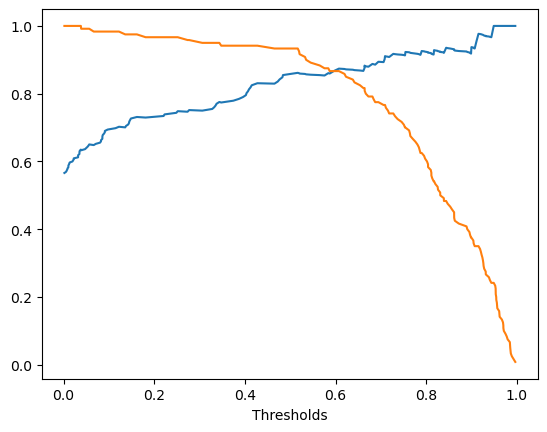

In [32]:
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
p_score=precision_score(estimation.Actual,estimation[0.54])
print(p_score)
p,r,t=precision_recall_curve(estimation.Actual,estimation.probs)
plt.figure()
plt.plot(t,p[:-1],label='Precision')
plt.plot(t,r[:-1],label='Recall')
plt.xlabel('Thresholds')
plt.show()


In [33]:
y_test=df_test.pop('target')

x_test=df_test[X_train1.columns.tolist()]


In [41]:
y_ppred=logreg.predict_proba(x_test)
y_ppred=y_ppred[:,1]
est=pd.DataFrame()
est['id']=x_test.index
est['prob']=y_ppred
est['predicted']=est['prob'].apply(lambda x:1 if x>=0.54 else 0)
est['actual']=y_test.values
est


,id,prob,predicted,actual
0,69,0.950823,1,1
1,300,0.018492,0,0
2,220,0.015002,0,0
3,134,0.964256,1,1
4,7,0.799923,1,1
...,...,...,...,...
86,203,0.270350,0,0
87,237,0.079553,0,0
88,29,0.716583,1,1
89,161,0.924943,1,1


In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(est['actual'],est['predicted'])

0.8681318681318682

In [43]:
from sklearn.metrics import f1_score

In [44]:
f1_score(est['actual'],est['predicted'])

0.8775510204081634